In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import load
import seaborn as sns

In [59]:
X_train, X_test, y_train, y_test = load('../../preprocessing/classification_data.joblib')

FileNotFoundError: [Errno 2] No such file or directory: '../../preprocessing/classification_data.joblib'

In [41]:
def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print('Train data:')
    model_info(y_train, y_train_pred)
    print('-----------------------------------------------')
    print('Test data:')
    model_info(y_test, y_test_pred)
    
    return model, y_train_pred, y_test_pred

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [51]:
def model_info(y_real, y_pred):
    #vizualizacija matrice konfuzije
    cm = confusion_matrix(y_real, y_pred)

    plt.figure(figsize=(4, 3))
    sns.set(font_scale=1)

    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        linewidths=0.5,
        cbar=False,
        square=True,
        xticklabels=['Zlato', 'Srebro', 'Bronza', 'Nista'],
        yticklabels=['Zlato', 'Srebro', 'Bronza', 'Nista'],
    )

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    print('Accuracy score: ', accuracy_score(y_real, y_pred))
    print('F1 score: ', f1_score(y_real, y_pred, average='macro'))
    

## Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

Train data:


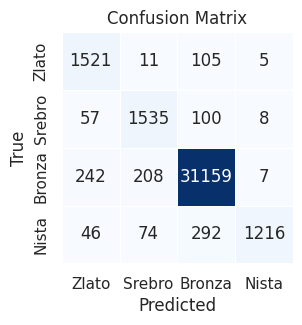

Accuracy score:  0.9684305472038485
F1 score:  0.8928566082312451
-----------------------------------------------
Test data:


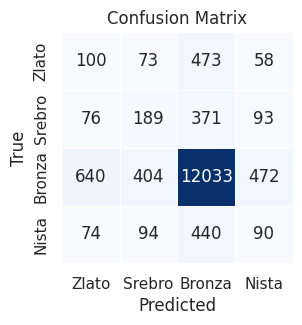

Accuracy score:  0.7915816326530613
F1 score:  0.3506700795157802


In [52]:
dtc = DecisionTreeClassifier(random_state=22)
dtc_model, y_train_pred_dtc, y_test_pred_dtc = build_model(dtc, X_train, X_test, y_train, y_test)

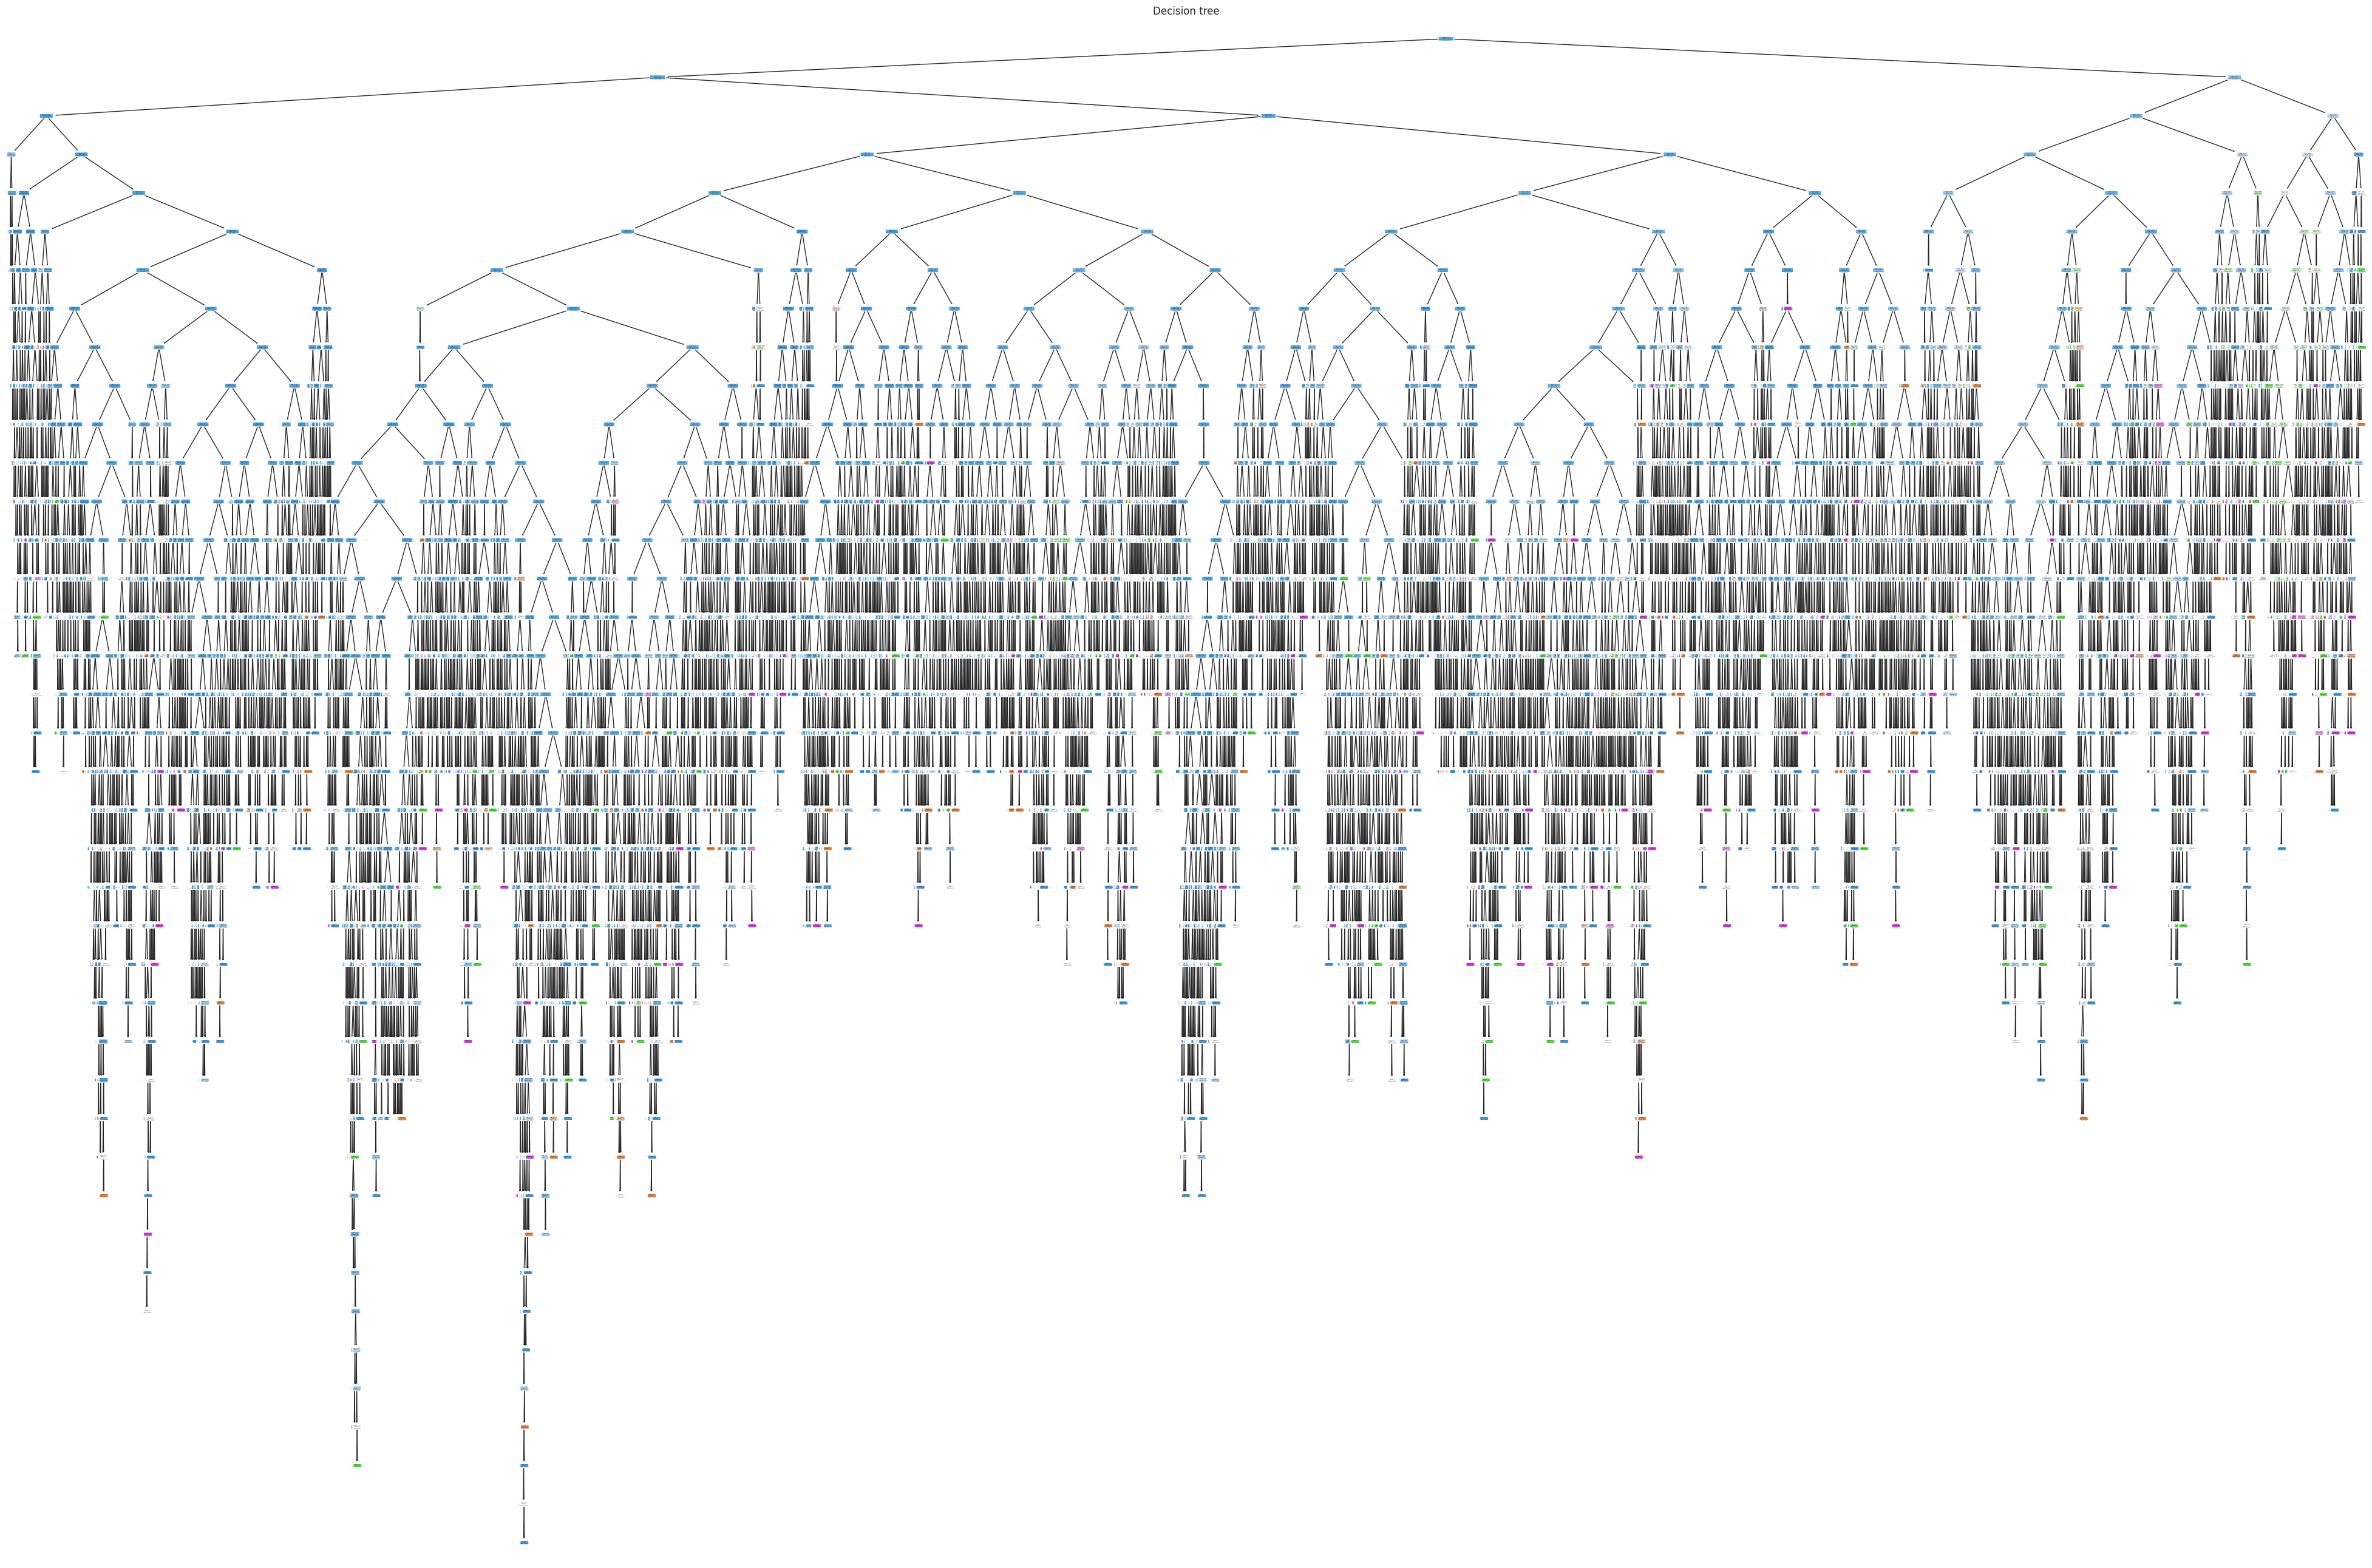

In [9]:
plt.figure(figsize=(50, 33))
_=plot_tree(dtc_model, feature_names = X_train.columns, class_names = ['Zlato', 'Srebro', 'Bronza', 'Nista'], filled = True, rounded = True)
plt.title("Decision tree")
plt.show()

num_nodes = dtc_model.tree_.node_count
depth = dtc_model.tree_.max_depth
print(f'Broj čvorova: {num_nodes}, dubina: {depth}')

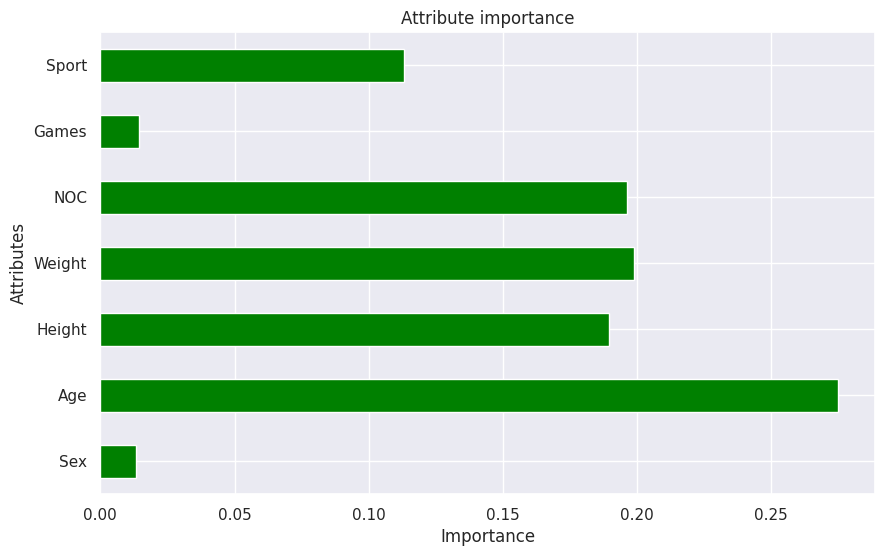

In [53]:
feature_importance = pd.Series(dtc_model.feature_importances_, index = X_train.columns)

plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color = 'green')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

## Optimizacija DecisionTree modela

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 39],
    'min_samples_leaf': [3, 4, 5, 6],
    'class_weight': [None, 'balanced']
}

In [58]:
estimator_dtc = GridSearchCV(DecisionTreeClassifier(random_state = 22), param_grid = params, scoring = 'accuracy')

In [57]:
estimator_dtc.fit(X_train, y_train)

ValueError: Invalid parameter 'n_estimators' for estimator DecisionTreeClassifier(random_state=42). Valid parameters are: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'].

In [45]:
print('Najbolji parametri: ')
estimator_dtc.best_params_

Najbolji parametri: 


{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 6}

In [46]:
print('Najbolji rezultat:')
estimator_dtc.best_score_

Najbolji rezultat:


0.8651670085982085

Train data:


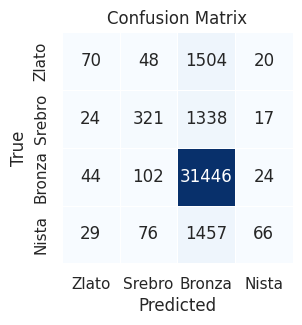

Accuracy score:  0.8720002186628765
-----------------------------------------------
Test data:


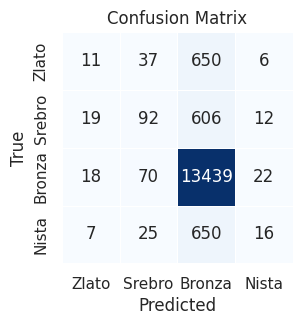

Accuracy score:  0.8646683673469387


In [47]:
best_model_dtc, y_train_pred_dtccv, y_test_pred_dtccv = build_model(estimator_dtc.best_estimator_, X_train, X_test, y_train, y_test)

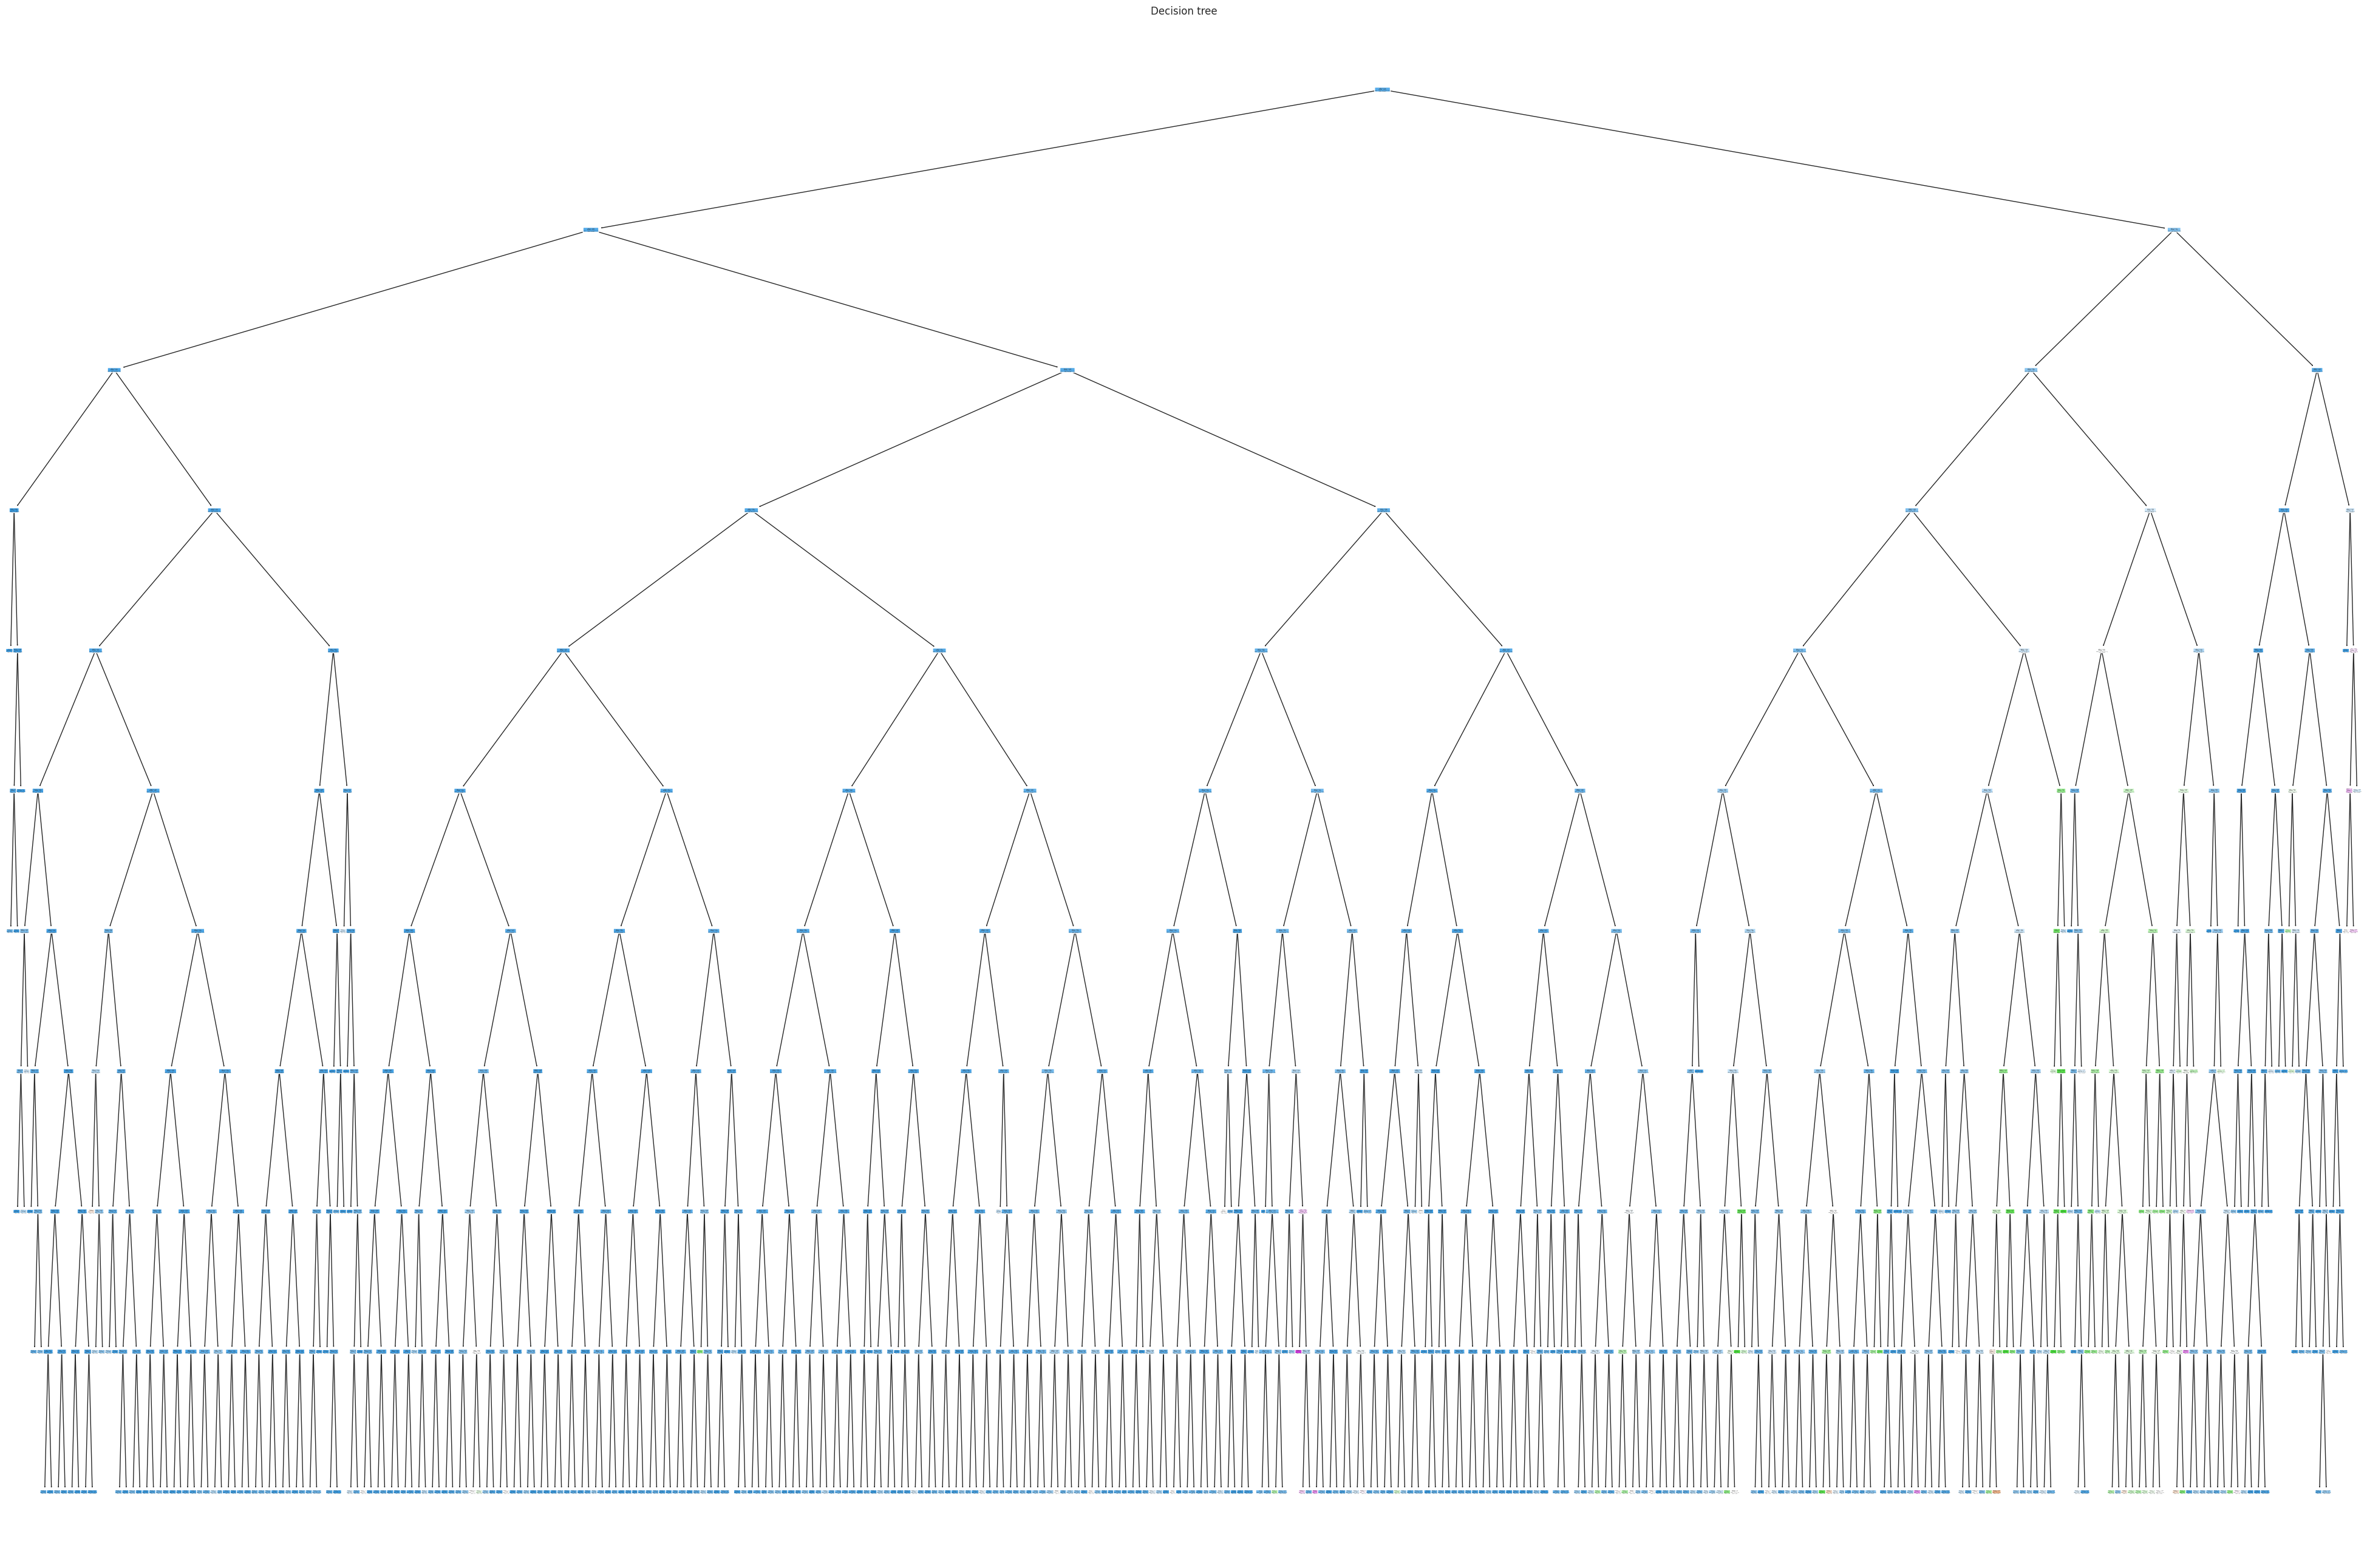

Broj čvorova: 847, dubina: 10


In [48]:
plt.figure(figsize=(50, 33))
_=plot_tree(best_model_dtc, feature_names = X_train.columns, class_names = ['Zlato', 'Srebro', 'Bronza', 'Nista'], filled = True, rounded = True)
plt.title("Decision tree")
plt.show()

num_nodes = best_model_dtc.tree_.node_count
depth = best_model_dtc.tree_.max_depth
print(f'Broj čvorova: {num_nodes}, dubina: {depth}')

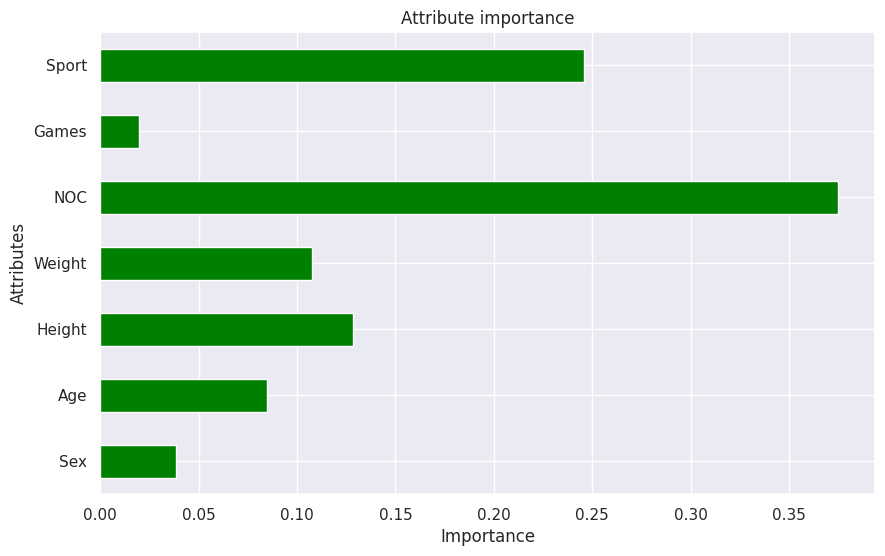

In [39]:
feature_importance = pd.Series(best_model_dtc.feature_importances_, index = X_train.columns)

plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color = 'green')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

## Slucajne Sume

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier()
rf_model, y_train_pred_rf, y_test_pred_rf = build_model(rf, X_train, X_test, y_train, y_test)

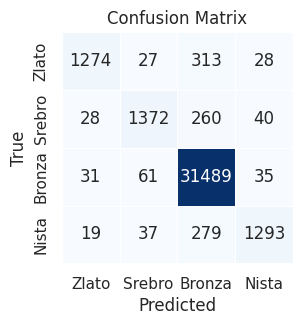

Accuracy score:  0.9683485486251572


In [26]:
model_info(y_train, y_train_pred_rf)

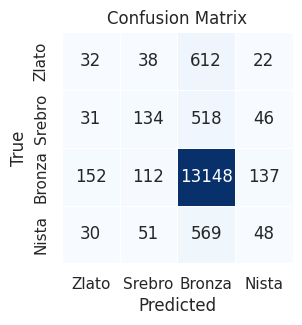

Accuracy score:  0.8521683673469388


In [27]:
model_info(y_test, y_test_pred_rf)

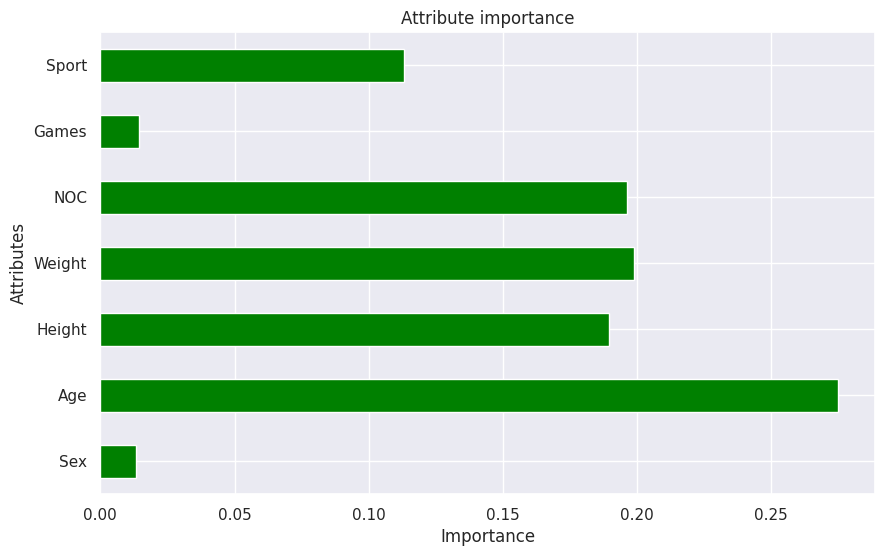

In [28]:
feature_importance = pd.Series(dtc_model.feature_importances_, index = X_train.columns)

# vizualizacija važnosti atributa u grafikonu
plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color = 'green')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

## Potraga za najboljim parametrima RandomForest modela

In [29]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [100, 200, 300, 400]
}

In [30]:
estimator_rf = GridSearchCV(RandomForestClassifier(), param_grid=params)

In [31]:
estimator_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [100, 200, 300, 400]})

In [32]:
estimator_rf.best_params_

{'criterion': 'log_loss', 'n_estimators': 400}

In [33]:
estimator_rf.best_score_

0.8544251551652803

In [34]:
best_model_rf, y_train_pred_rfcv, y_test_pred_rfcv = build_model(estimator_rf.best_estimator_, X_train, X_test, y_train, y_test)

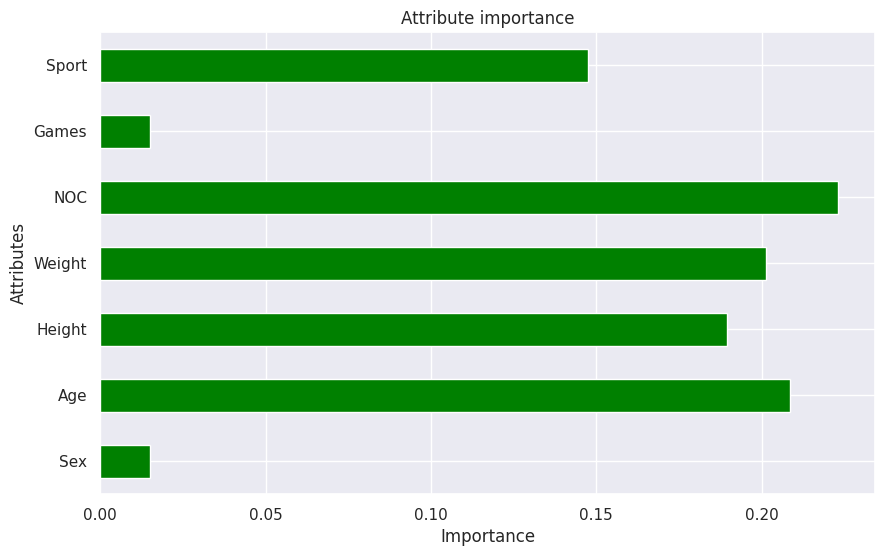

In [35]:
feature_importance = pd.Series(best_model_rf.feature_importances_, index = X_train.columns)

# vizualizacija važnosti atributa u grafikonu
plt.figure(figsize = (10, 6))  
feature_importance.plot.barh(color = 'green')
plt.title("Attribute importance")
plt.xlabel("Importance")
plt.ylabel("Attributes")

plt.show()

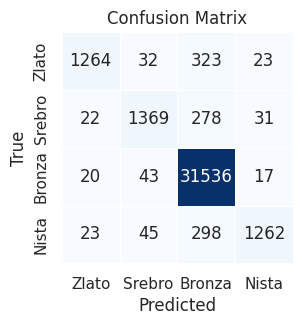

Accuracy score:  0.9684305472038485


In [36]:
model_info(y_train, y_train_pred_rfcv)

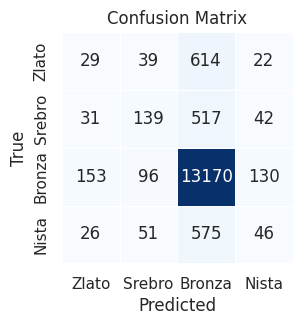

Accuracy score:  0.8535714285714285


In [37]:
model_info(y_test, y_test_pred_rfcv)